In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from utils import Experiment_0D

In [14]:
%matplotlib inline

In [15]:
config = 'config.yaml'
exp = Experiment_0D(config)

Seed: 0


In [16]:
x0 = exp.generate_data(mu=0, n=10000)
x1 = exp.generate_data(mu=1, n=10000)

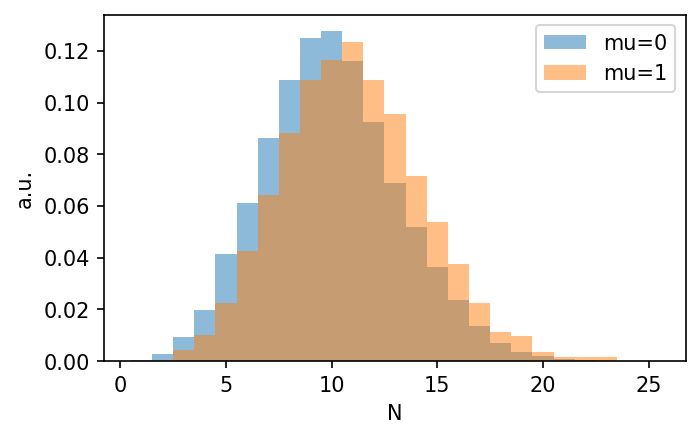

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=150)

n_max = max(max(x0), max(x1))
integer_bins = np.linspace(0, n_max, n_max+1) + 0.5
ax.hist(x0, bins=integer_bins, alpha=0.5, label='mu=0', density=True)
ax.hist(x1, bins=integer_bins, alpha=0.5, label='mu=1', density=True)
ax.legend()
ax.set_xlabel('N')
ax.set_ylabel('a.u.')
plt.show()

In [26]:
mu_scan = np.linspace(0, 10, 10)
exp.get_q_distributions(mu_scan, n=1000)

100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


/var/folders/40/2yzrw8k93wdctqr9dxlvkrfh0000gn/T/ipykernel_98564/3829558695.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


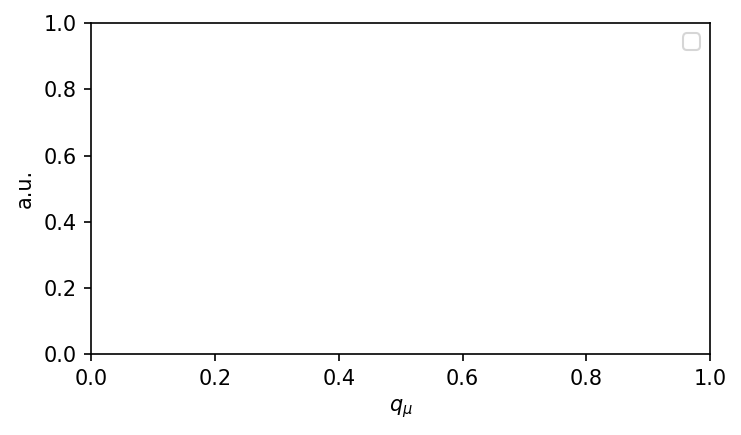

In [28]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=150)
bins = np.linspace(0, 1, 40)

# Initialize the plot
def init():
    ax.clear()
    ax.set_xlabel('$q_{\\mu}$')
    ax.set_ylabel('a.u.')
    ax.legend()
    return ax,

# Update function for each frame
def update(i):
    ax.clear()
    ax.hist(exp.q_distributions[mu_scan[i]], label=f'mu={mu_scan[i]:.2f}', bins=bins, alpha=0.5, density=True)
    ax.set_xlabel('$q_{\\mu}$')
    ax.set_ylabel('a.u.')
    ax.set_ylim(0, 50)
    ax.set_xlim(bins[0], bins[-1])
    ax.legend()
    plt.tight_layout()
    return ax,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(mu_scan), init_func=init, blit=False)

# Display the animation
HTML(ani.to_jshtml())